In [15]:
! pip install datacompy

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np 
import datacompy


#what frequency band is most pronunced in confused students vs non confused students?

In [17]:
eeg_df = pd.read_csv("resources/EEG_data.csv")
eeg_demo_df = pd.read_csv("resources/demographic_info.csv")

In [18]:
eeg_df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [19]:
eeg_df = eeg_df.drop(eeg_df[eeg_df["SubjectID"]==6].index, inplace=False)

In [20]:
eeg_demo_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [21]:
#non confused
non_eeg_df= eeg_df[eeg_df["user-definedlabeln"] == 0]
non_eeg_df.pd = pd.DataFrame(non_eeg_df)
non_eeg_df.pd.rename(columns = {'user-definedlabeln':'Confusion'}, inplace = True)
non_eeg_df.head()


/Users/sho-abe/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Confusion
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [23]:
#confused
confused_eeg_df = eeg_df[eeg_df["user-definedlabeln"] == 1]
confused_eeg_df.pd = pd.DataFrame(confused_eeg_df)
confused_eeg_df.pd.rename(columns = {'user-definedlabeln':'Confusion'}, inplace = True)
confused_eeg_df


/Users/sho-abe/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Confusion
144,0.0,1.0,47.0,23.0,-58.0,587813.0,276755.0,47356.0,13611.0,18425.0,112767.0,55090.0,6949.0,0.0,1.0
145,0.0,1.0,48.0,37.0,18.0,264810.0,7319.0,1347.0,1468.0,1754.0,2469.0,2389.0,1271.0,0.0,1.0
146,0.0,1.0,56.0,44.0,84.0,1817666.0,259465.0,22213.0,71445.0,69577.0,105431.0,141042.0,29641.0,0.0,1.0
147,0.0,1.0,50.0,50.0,-24.0,821687.0,143836.0,33747.0,24584.0,40563.0,27901.0,20353.0,9265.0,0.0,1.0
148,0.0,1.0,40.0,51.0,-68.0,242816.0,146001.0,50443.0,2625.0,9570.0,15659.0,12204.0,11630.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,9.0,8.0,54.0,56.0,36.0,145408.0,21303.0,10291.0,1972.0,1497.0,16489.0,15483.0,7688.0,1.0,1.0
12685,9.0,8.0,41.0,54.0,116.0,2130529.0,369714.0,256070.0,90430.0,88440.0,37014.0,50133.0,58149.0,1.0,1.0
12686,9.0,8.0,35.0,60.0,20.0,108557.0,20055.0,2915.0,2808.0,2045.0,3989.0,5545.0,2442.0,1.0,1.0
12687,9.0,8.0,44.0,54.0,117.0,1691185.0,276820.0,20304.0,11931.0,26238.0,74533.0,123884.0,16625.0,1.0,1.0


In [24]:
non_confused_reduced_df = non_eeg_df[["SubjectID", "Delta"]]
confused_reduced_df = confused_eeg_df[["SubjectID", "Delta"]]

<AxesSubplot:title={'center':'Delta'}, xlabel='user-definedlabeln'>

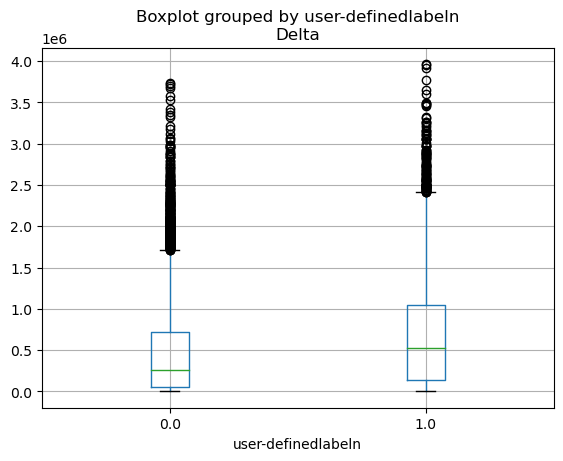

In [105]:
eeg_df = eeg_df[["Delta","user-definedlabeln"]]
eeg_fig = eeg_df.boxplot("Delta", by='user-definedlabeln')
eeg_fig

In [ ]:
non_median=non_stat.loc["50%"]
confused_median= confused_stat.loc["50%"]

In [ ]:
new_df=pd.DataFrame({"non":non_median,"confused":confused_median})

In [ ]:
new_df

In [ ]:
plt.scatter()

In [ ]:
plt.scatter(non_median,confused_median)
plt.axis("square")
plt.grid()
plt.xlabel("Non Confused")
plt.ylabel("Confused")
plt.title("Median Values Confuse VS Non Confused")

The above Scatter plot shows that there is a substantial change between confused students vs non confused students from  a 10000 frequency to slighty above 50000 frequency 

In [ ]:
#new_df.plot.bar()
new_df.plot(kind="bar",title="Confused VS Non Confused")
#Here you can see that ther's a substantial difference between confused vs non confused 

In [ ]:
new_df["pct change"]=(new_df["confused"]-new_df["non"])/new_df["non"]*100
new_df

In the above bar garaph you can observe all of the bands with their confused frequency and non confused frequency.This analysis shows the delta band frequency is the most pronunced band in the confused student and also in the non confused student. You can see a 105.8% change in the delta band  